Recognizing Number in the Image using Logstic Regression

Problem Statement: Predict number in the blurred image.

In [30]:
#@title import libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

digits = load_digits()

In [31]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)


Image Data Shape (1797, 64)
Label Data Shape (1797,)


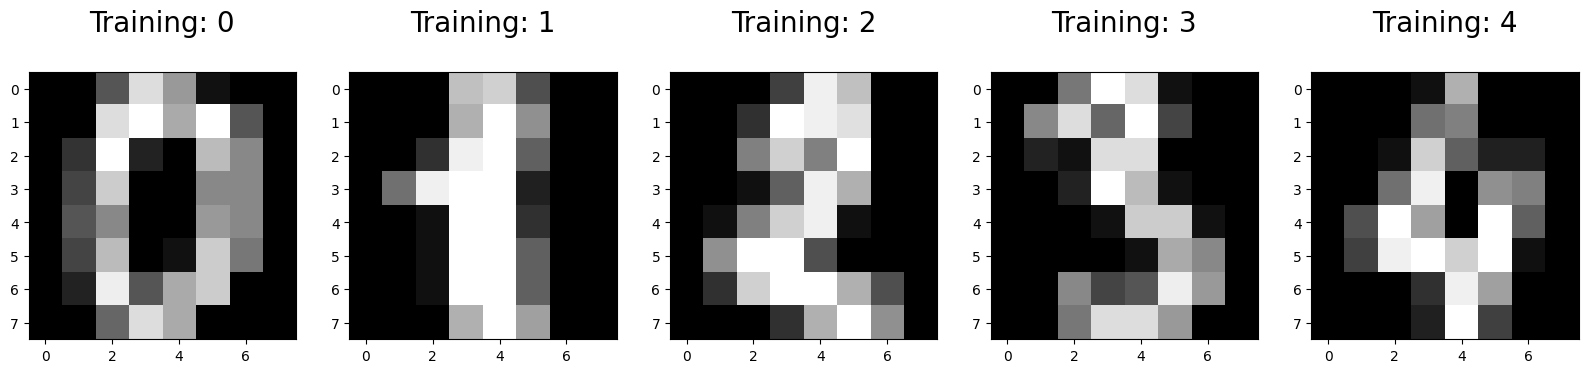

In [32]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index+1)
  plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize=20)

In [33]:
#@title Splitting data into Test & Train Dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state = 2)

In [34]:
print(x_train.shape)

(1383, 64)


In [35]:
print(y_train.shape)

(1383,)


In [36]:
print(x_test.shape)

(414, 64)


In [37]:
print(y_test.shape)

(414,)


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logisticregr = LogisticRegression()
logisticregr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
#predict for one observation
print(logisticregr.predict(x_test[0].reshape(1, -1)))

[4]


In [41]:
#predict for 10 observations
logisticregr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [42]:
predictions = logisticregr.predict(x_test)

In [43]:
score = logisticregr.score(x_test, y_test)
print(score)

0.9516908212560387


In [45]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy score: 0.9516908212560387')

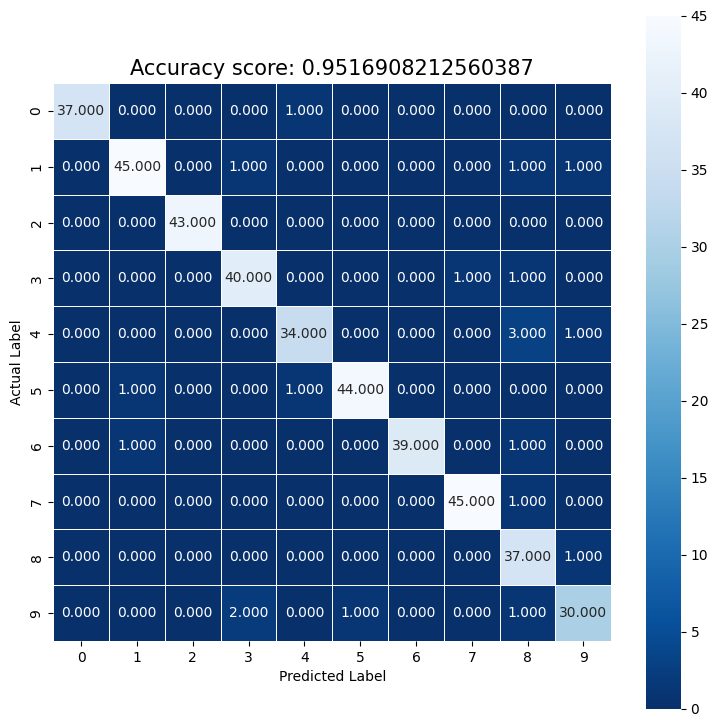

In [48]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title =  'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size=15)

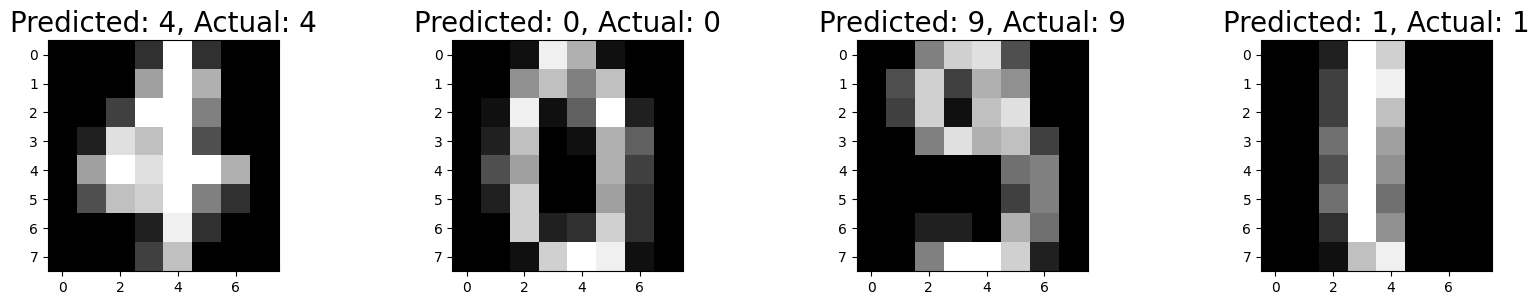

In [51]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
  if predict==actual:
    misclassifiedIndex.append(index)
  index += 1
plt.figure(figsize=(20, 3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
  plt.subplot(1, 4, plotIndex+1)
  plt.imshow(np.reshape(x_test[wrong], (8, 8)), cmap = plt.cm.gray)
  plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 20)